# Table of Contents
01. Importing Libraries
02. Importing Data
03. Exploring Relationships

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#checking matplotlib version
matplotlib.__version__

'3.5.1'

In [3]:
%matplotlib inline

## 02. Importing Data

In [4]:
#define path
path = r'C:\Users\legra\Desktop\08-2022 Airline Delays Analysis'


In [9]:
#import data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'wrangled_v3.csv'), index_col = False)

In [10]:
#checking df
df.shape

(38701, 25)

In [11]:
df.head()

,Unnamed: 0,year,month,carrier,carrier_name,airport name,code,city,state_code,arriving_flight_count,...,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes,state
0,0,2021,12,9E,Endeavor Air Inc.,Lehigh Valley International,ABE,Allentown/Bethlehem/Easton,PA,127,...,2.95,0,0,264,119,0,68,0,77,Pennsylvania
1,1,2021,12,9E,Endeavor Air Inc.,Southwest Georgia Regional,ABY,Albany,GA,73,...,1.87,0,0,342,125,0,142,0,75,Georgia
2,2,2021,12,9E,Endeavor Air Inc.,Alexandria International,AEX,Alexandria,LA,62,...,1.15,0,0,439,156,0,103,0,180,Louisiana
3,3,2021,12,9E,Endeavor Air Inc.,Augusta Regional at Bush Field,AGS,Augusta,GA,166,...,2.74,0,1,1266,291,693,167,0,115,Georgia
4,4,2021,12,9E,Endeavor Air Inc.,Albany International,ALB,Albany,NY,52,...,0.82,0,0,497,278,180,21,0,18,New York


In [12]:
#drop unnamed column 
df = df.drop(columns=['Unnamed: 0'])

In [13]:
#create subset of top airports by passenger travel

df_top_5 = df[df['code'].isin(['ATL', 'DFW', 'DEN', 'ORD', 'LAX'])]
df_top_5.head()

,year,month,carrier,carrier_name,airport name,code,city,state_code,arriving_flight_count,arrival_delayed_15_minutes_more,...,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes,state
5,2021,12,9E,Endeavor Air Inc.,Hartsfield-Jackson Atlanta International,ATL,Atlanta,GA,3705,388.0,...,160.18,12,4,30500,10300,2853,4638,0,12709,Georgia
36,2021,12,9E,Endeavor Air Inc.,Dallas/Fort Worth International,DFW,Dallas/Fort Worth,TX,3,1.0,...,0.44,0,0,41,5,0,18,0,18,Texas
84,2021,12,9E,Endeavor Air Inc.,Chicago O'Hare International,ORD,Chicago,IL,37,2.0,...,0.00,1,0,79,79,0,0,0,0,Illinois
114,2021,12,AA,American Airlines Inc.,Hartsfield-Jackson Atlanta International,ATL,Atlanta,GA,718,130.0,...,47.79,1,0,10649,4739,0,556,42,5312,Georgia
133,2021,12,AA,American Airlines Inc.,Denver International,DEN,Denver,CO,816,159.0,...,42.82,2,0,8131,2527,172,2370,18,3044,Colorado


## 03. Exploring Relationships

### Correlations

In [14]:
#create a correlation matrix using pandas
df_top_5.corr()

,year,month,arriving_flight_count,arrival_delayed_15_minutes_more,carrier_delay_count,weather_delay_count,nas_delay_count,security_delay_count,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
year,1.000000,0.020950,0.072441,0.194924,0.212335,0.177227,0.116408,0.189065,0.204073,-0.085102,0.118251,0.198220,0.178252,0.166109,0.155274,0.195757,0.202805
month,0.020950,1.000000,0.011301,0.040785,0.087988,-0.032585,-0.022068,0.100200,0.057565,-0.122455,-0.000575,0.028388,0.056076,-0.055940,-0.039754,0.055483,0.050452
arriving_flight_count,0.072441,0.011301,1.000000,0.860272,0.805045,0.676193,0.790789,0.580947,0.763332,0.368699,0.594903,0.818259,0.813147,0.608970,0.718665,0.522233,0.721716
arrival_delayed_15_minutes_more,0.194924,0.040785,0.860272,1.000000,0.908919,0.806819,0.886945,0.647653,0.942710,0.242750,0.734389,0.969421,0.888477,0.749435,0.882088,0.561857,0.914419
carrier_delay_count,0.212335,0.087988,0.805045,0.908919,1.000000,0.755715,0.663059,0.587658,0.821623,0.216120,0.648847,0.910641,0.965434,0.694406,0.697342,0.532110,0.795181
weather_delay_count,0.177227,-0.032585,0.676193,0.806819,0.755715,1.000000,0.705722,0.508887,0.694147,0.166771,0.709316,0.843492,0.780462,0.953895,0.766053,0.472943,0.721483
nas_delay_count,0.116408,-0.022068,0.790789,0.886945,0.663059,0.705722,1.000000,0.557772,0.770034,0.230290,0.663392,0.816595,0.660070,0.665295,0.941355,0.475196,0.739670
security_delay_count,0.189065,0.100200,0.580947,0.647653,0.587658,0.508887,0.557772,1.000000,0.623721,0.098325,0.505431,0.621126,0.574472,0.443773,0.520814,0.871093,0.611308
late_aircraft_count,0.204073,0.057565,0.763332,0.942710,0.821623,0.694147,0.770034,0.623721,1.000000,0.224473,0.680825,0.917963,0.796896,0.639174,0.770956,0.522525,0.971406
arrival_cancelled_count,-0.085102,-0.122455,0.368699,0.242750,0.216120,0.166771,0.230290,0.098325,0.224473,1.000000,0.169909,0.241865,0.244825,0.173487,0.212360,0.072239,0.210479


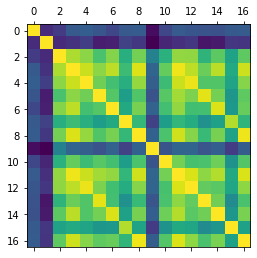

In [15]:
#create a correlation heatmap using matplotlib
plt.matshow(df_top_5.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

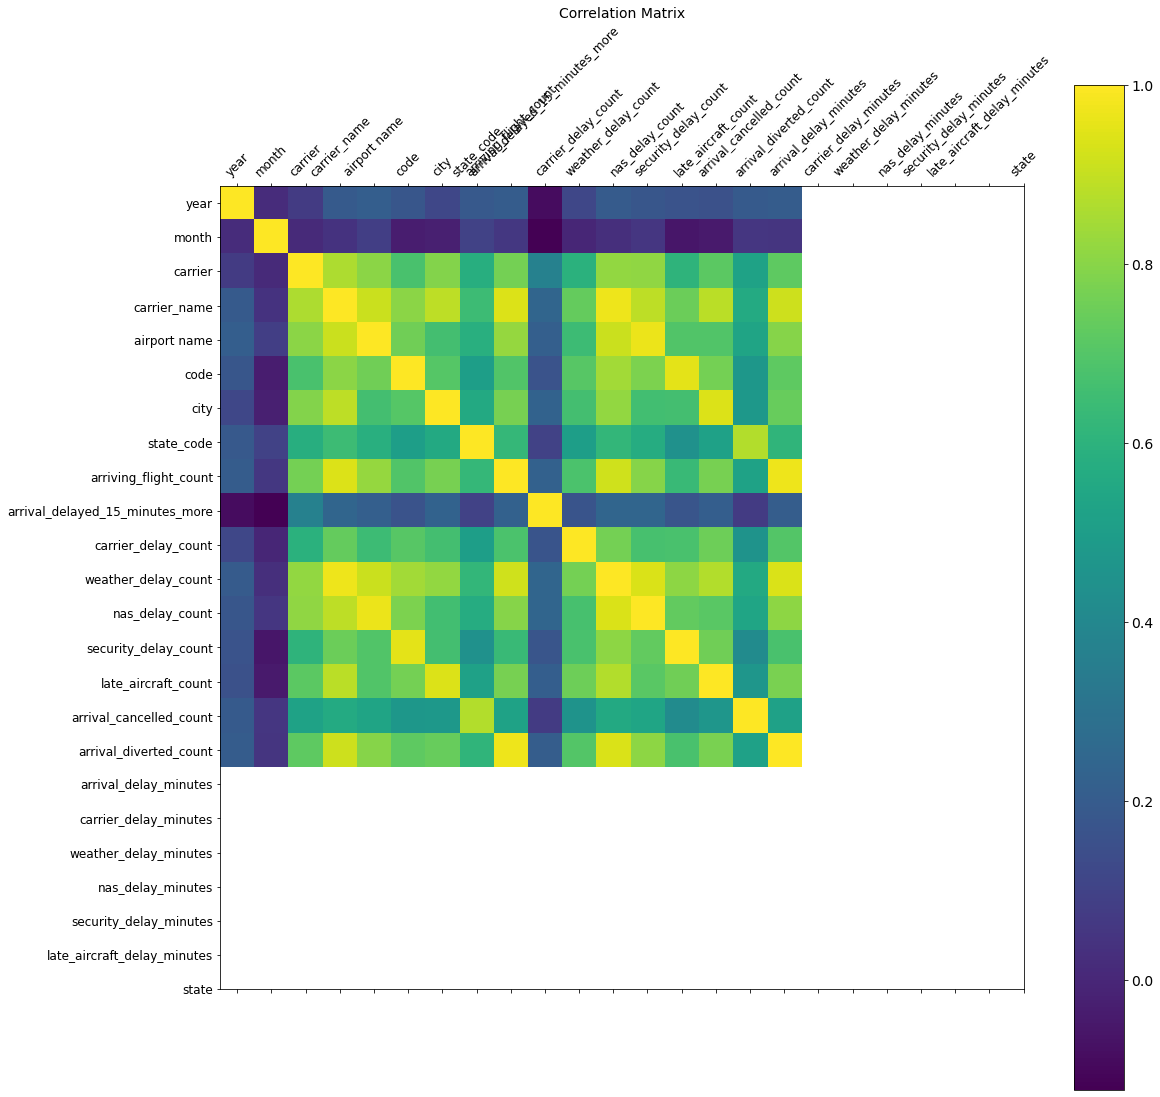

In [16]:
#add labels, legend, and change size of heatmap

#figure size
f = plt.figure(figsize=(18,18)) 
#type of plot
plt.matshow(df_top_5.corr(), fignum=f.number)
#x axis label
plt.xticks(range(df_top_5.shape[1]), df_top_5.columns, fontsize=12, rotation=45)
#y axis label
plt.yticks(range(df_top_5.shape[1]), df_top_5.columns, fontsize=12)
#add color legend
cb = plt.colorbar()
#add font size
cb.ax.tick_params(labelsize=14)
#add title
plt.title('Correlation Matrix', fontsize=14)

### Create a correlation heatmap using seaborn:

In [17]:
df_top_5.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport name', 'code',
       'city', 'state_code', 'arriving_flight_count',
       'arrival_delayed_15_minutes_more', 'carrier_delay_count',
       'weather_delay_count', 'nas_delay_count', 'security_delay_count',
       'late_aircraft_count', 'arrival_cancelled_count',
       'arrival_diverted_count', 'arrival_delay_minutes',
       'carrier_delay_minutes', 'weather_delay_minutes', 'nas_delay_minutes',
       'security_delay_minutes', 'late_aircraft_delay_minutes', 'state'],
      dtype='object')

In [19]:
#create a subset excluding month, year, carrier, airport
sub = df_top_5[['carrier_name', 'airport name', 'arriving_flight_count', 'arrival_delayed_15_minutes_more', 'carrier_delay_count', 'weather_delay_count', 'nas_delay_count', 'security_delay_count', 'late_aircraft_count', 'arrival_cancelled_count', 'arrival_diverted_count', 'arrival_delay_minutes', 'carrier_delay_minutes', 'weather_delay_minutes', 'nas_delay_minutes', 'security_delay_minutes', 'late_aircraft_delay_minutes']]

In [45]:
sub

,carrier_name,airport_name,arriving_flight_count,arrival_delayed_15_minutes_more,carrier_delay_count,weather_delay_count,nas_delay_count,security_delay_count,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
0,Endeavor Air Inc.,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",127.0,9.0,2.51,0.00,3.54,0.0,2.95,0.0,0.0,264.0,119.0,0.0,68.0,0.0,77.0
1,Endeavor Air Inc.,"Albany, GA: Southwest Georgia Regional",73.0,11.0,5.02,0.00,4.11,0.0,1.87,0.0,0.0,342.0,125.0,0.0,142.0,0.0,75.0
2,Endeavor Air Inc.,"Alexandria, LA: Alexandria International",62.0,8.0,2.63,0.00,4.22,0.0,1.15,0.0,0.0,439.0,156.0,0.0,103.0,0.0,180.0
3,Endeavor Air Inc.,"Augusta, GA: Augusta Regional at Bush Field",166.0,18.0,8.53,3.25,3.49,0.0,2.74,0.0,1.0,1266.0,291.0,693.0,167.0,0.0,115.0
4,Endeavor Air Inc.,"Albany, NY: Albany International",52.0,6.0,3.15,1.88,0.15,0.0,0.82,0.0,0.0,497.0,278.0,180.0,21.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38696,Republic Airline,"Tucson, AZ: Tucson International",7.0,0.0,0.00,0.00,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38697,Republic Airline,"Traverse City, MI: Cherry Capital",1.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38698,Republic Airline,"Knoxville, TN: McGhee Tyson",112.0,10.0,1.79,1.00,4.01,0.0,3.20,0.0,0.0,352.0,39.0,46.0,102.0,0.0,165.0
38699,Republic Airline,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",8.0,1.0,0.00,0.00,1.00,0.0,0.00,0.0,0.0,47.0,0.0,0.0,47.0,0.0,0.0


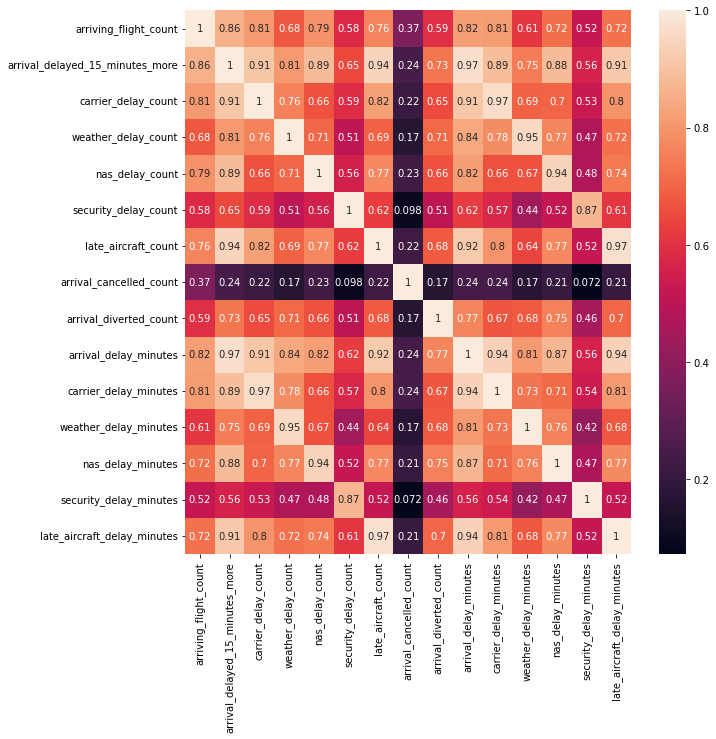

In [20]:
#create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

#create the correlation heatmap in seaborn by applying a heatmap onto the correlation
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

As to be expected there are strong correlations between delay counts and delay minutes for each category. Arrivals cancelled and security delays seem to have the smallest correlation to other variables. Carrier delay count and arrival delay minutes have a strong positive correlation.Late aircraft count also has a strong positive correlation to arrival delayed 15 minutes or more.

## Scatterplots:

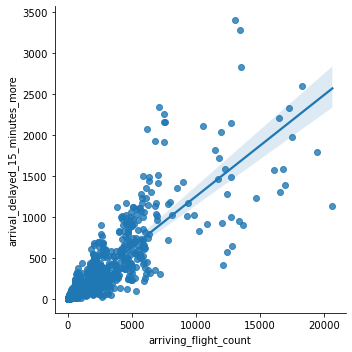

In [21]:
#create a scatterplot for arrival count and arrival delay 15 minutes or more
sns.lmplot(x = 'arriving_flight_count', y = 'arrival_delayed_15_minutes_more', data = df_top_5)

As the number of arriving flights increase past 7500, the number of arrivals delayed 15 minutes or more become more random.

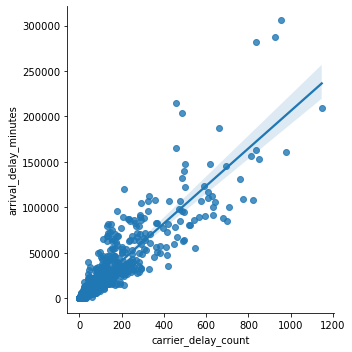

In [22]:
#create scatterplot for arrival delay minutes and carrier delay count
sns.lmplot(y = 'arrival_delay_minutes', x = 'carrier_delay_count', data = df_top_5)

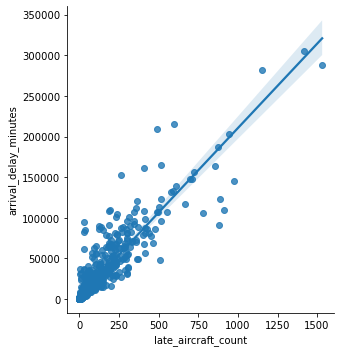

In [23]:
#create scatterplot for late aircraft count and arrival delay minutes
sns.lmplot(x = 'late_aircraft_count', y = 'arrival_delay_minutes', data = df_top_5)

These scatterplots show strong positive correlations between variables. As carrier delay count and late aircraft count increases the arrival delay minutes also increase. There are a few outliers which are suspected to be from airports that have a high volume of flights.

### Pair Plots

In [24]:
#create subset

sub2 = sub[['arriving_flight_count', 'arrival_delayed_15_minutes_more', 'carrier_delay_count','weather_delay_count', 'nas_delay_count', 'security_delay_count', 'late_aircraft_count']]

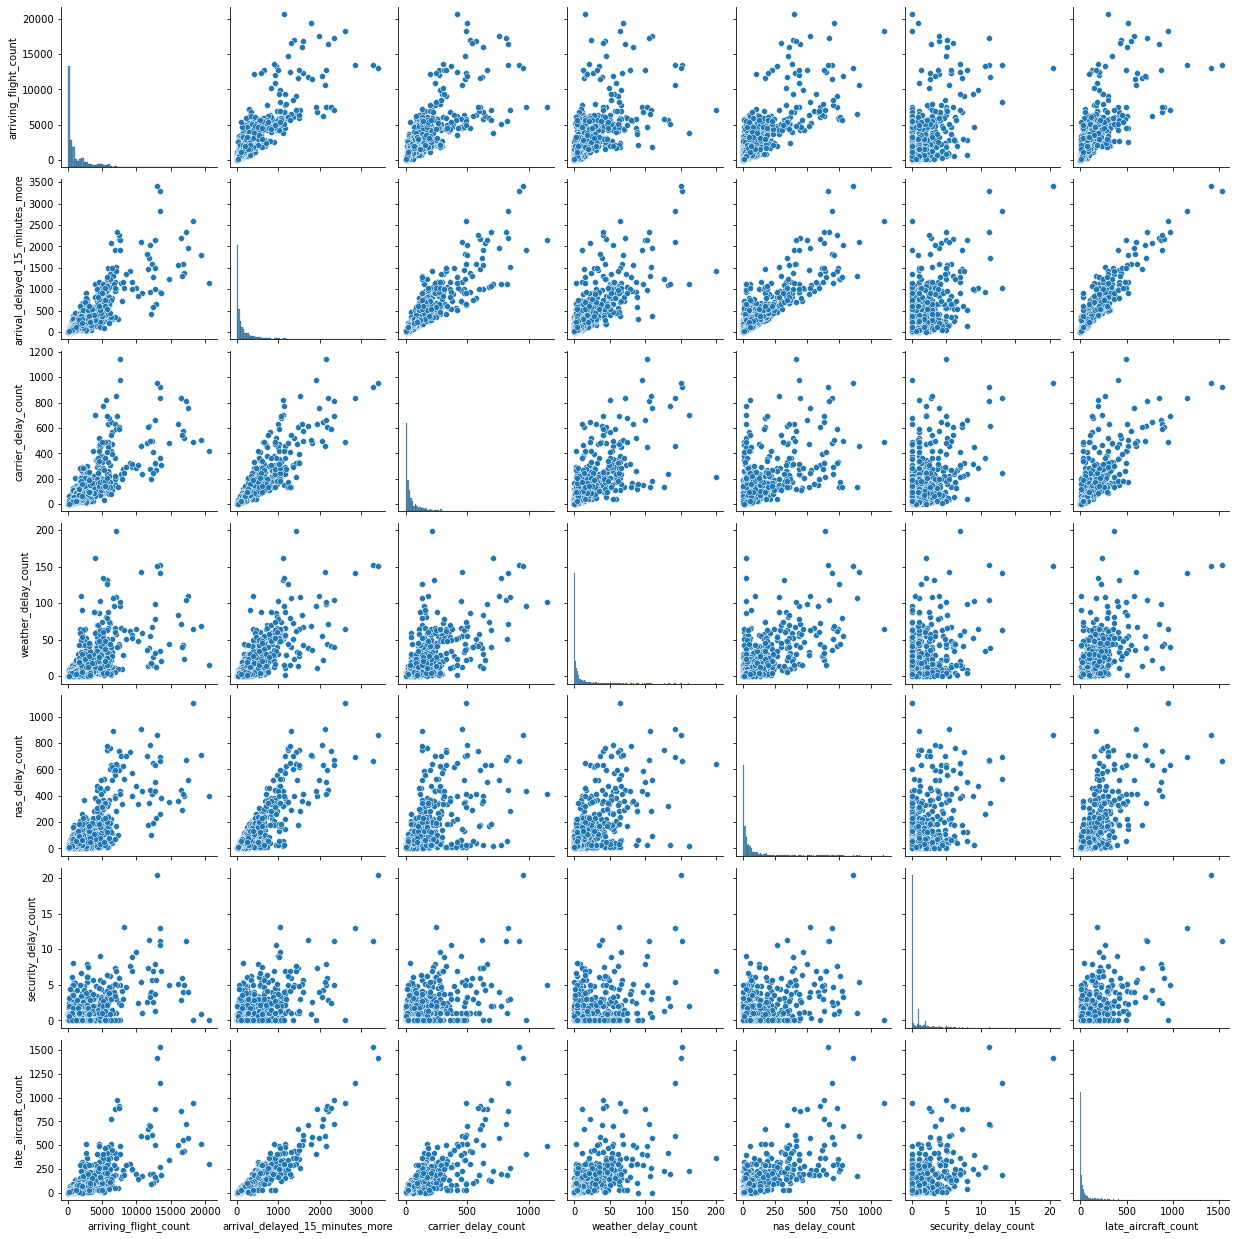

In [25]:
#create pair plot
g = sns.pairplot(sub2)

The pair plot shows that late aircraft count and arrival dalyed 15 minutes or more have a closer relationship than any other delay type, this is followed by carrier dealys. to find what type of delays contribute the most to arrival delay 15 minutes or more I will explore both of these vaiables further. Security dealys make up the least amount of delays, I would like to explore this to see how location may play in to this. 

### Categorical Plots

<AxesSubplot:xlabel='late_aircraft_count', ylabel='Count'>

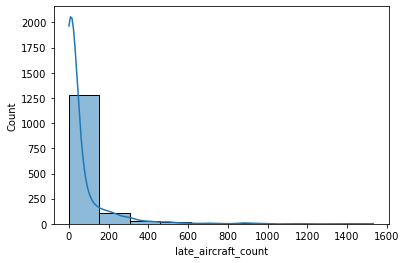

In [27]:
#use histogram to visualize distribution
sns.histplot(df_top_5['late_aircraft_count'], bins = 10, kde = True)

In [28]:
#create a categorical variable that splits delay count columns into categories
df_top_5.loc[df_top_5['late_aircraft_count'] < 3, 'Late Aircraft Category'] = 'Low count'
df_top_5.loc[df_top_5['late_aircraft_count'] >= 3 & (df_top_5['late_aircraft_count'] <6),'Late Aircraft Category'] = 'Medium count'
df_top_5.loc[df_top_5['late_aircraft_count'] >= 6, 'Late Aircraft Category'] = 'High count'

C:\Users\legra\AppData\Local\Temp\ipykernel_25832\566447142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5.loc[df_top_5['late_aircraft_count'] < 3, 'Late Aircraft Category'] = 'Low count'


In [29]:
df_top_5['Late Aircraft Category'].value_counts(dropna = False)

High count      871
Medium count    307
Low count       267
Name: Late Aircraft Category, dtype: int64

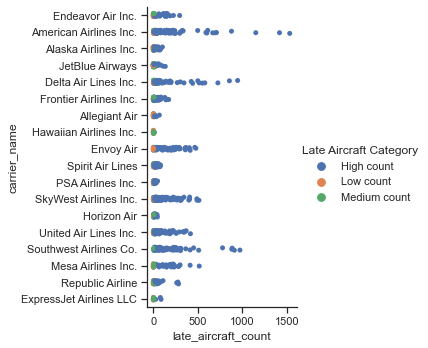

In [30]:
# Create a categorical plot in seaborn using the late aircraft categories created above

sns.set(style="ticks")
g = sns.catplot(y='carrier_name', x='late_aircraft_count', hue="Late Aircraft Category", data=df_top_5)

Carriers experience a high count of late aircrafts

No questions previously generated can be answered at this time.
I would like to know what affect if any does airport location have on security delays as the current exploration shows no correlation to other variables.
Current Hypothesis: The more arriving flights an airport has, the higher the amount of carrier delays that airprt will experience.